# Goal of the project
The goal of this project is to learn a policy for an inverted pendulum model to make it do a swing-up motion. Beyond the task of inverting a pendulum, the goal is to also gain an understanding on how Q-learning works, its limitations and advantages.

To make the problem interesting, the inverted pendulum has a limit on the maximum torque it can apply, therefore it is necessary for the pendulum to do a few "back and forth" motions to be able to reach the inverted position ($\theta=\pi$) from the standing still non-inverted position ($\theta=0$). 

<img src='pendulum.png' width="120">

In the following, we will write $x = \begin{pmatrix} \theta \\ \omega \end{pmatrix}$ as the vector of states of the system. We will also work with time-discretized dynamics, and refer to $x_n$ as the state at time $t = n \Delta t$ (assuming discretization time $\Delta t$)

We want to minimize the following discounted cost function
$$\sum_{i=0}^{\infty} \alpha^i g(x_i, u_i)$$ where 
$$g(x_i, u_i) = (\theta-\pi)^2 + 0.01 \cdot \dot{\theta}_i^2 + 0.0001 \cdot u_i^2 \qquad \textrm{and} \qquad\alpha=0.99$$
This cost mostly penalizes deviations from the inverted position but also encourages small velocities and control.

## Q-learning with a table
In the first part, we will implement the Q-learning algorithm with a table. To that end, we are given a robot (defined in the package ```pendulum.py```) with a function ```get_next_state(x,u)``` that returns $x_{n+1}$ given $(x_n, u_n)$. We will assume that $u$ can take only three possible values. Note that $\theta$ can take any value in $[0,2\pi)$ and that $\omega$ can take any value between $[-6,6]$. 

In order to build the table, we will need to discretize the states. So for the learning algorithm we will use 50 discretized states for $\theta$ and 50 for $\omega$. Keep in mind that the real states of the pendulum used to generate an episode will not be discretized.


1. Write a function ```get_cost(x,u)``` that returns the current cost $g(x,u)$ as a function of the current state and control.

2. What is the dimension of the Q-table that you will need to implement (as a numpy array)? Why?

3. How can you compute the optimal policy from the Q-table? And the optimal value function? Write a function ```get_policy_and_value_function(q_table)``` that computes both given a Q-table as an input.

4. Write a function ```q_learning(q_table)``` that implements the tabular Q-learning algorithm (use episodes of 100 timesteps and an epsilon greedy policy with $\epsilon=0.1$). The function should get as an input an initial Q-table  and return a learned Q-table of similar size. Use the function ```get_next_state``` from the pendulum package to generate the episode (do not discretize the real state of the pendulum!). During learning store the cost per episode to track learning progress.

5. How many epsilodes (approximately) does it take for Q-learning to learn how to invert the pendulum when $u \in \{-4,0,4\}$? (use a learning rate of 0.1). Show the learning progress in a plot.

6. Using the simulate / animate functions (cf. below) how many back and forth of the pendulum are necessary to go from $x = [0,0]$ to the fully inverted position? Plot the time evolution of $\theta$ and $\omega$. 

7. Plot the found policy and value function as 2D images (cf. below).

8. Answer questions 5 to 7 when using $u \in \{-5,0,5\}$. What quantitative differences do you see between the computed policies in 5. and 8.? Can you explain?

9. How is learning affected when changing $\epsilon$ and the learning rate? Why?

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import pendulum

In [2]:
# we can get the integration step used in the simulation
print(f'dt is {pendulum.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {pendulum.NUMBER_STATES} and number of controls {pendulum.NUMBER_CONTROLS}')
print('the states are indexed as follows: theta, omega')

# we can get the maximum velocity of the pendulum (omega)
print(f'the max velocity is {pendulum.MAX_VELOCITY} rad/seconds')

dt is 0.1
number of states 2 and number of controls 1
the states are indexed as follows: theta, omega
the max velocity is 6.0 rad/seconds


In [3]:
# the next_state function allows to compute the next state given a current state and action
# This is going to be very helpful to run an episode!

# assume we set x = [theta, omega] = [0,0] and u = 5, we can get the next state using
x = np.array([0.,0.])
u = 5
x_next = pendulum.get_next_state(x, u)

print(f'the next state is {x_next}')

the next state is [0.02227801 0.48969119]


In [4]:
# we can also simulate the robot but we need to provide a controller of the following form
def dummy_controller(x):
    """
        the prototype of a controller is as follows
        x is a column vector containing the state of the robot
        
        this controller needs to return a scalar
        you may want to modify this controller to use the policy table to compute control output
    """
    # here we do nothing and just return a 0 control
    return 0.


# we can now simulate for a given number of time steps - here we do 10 seconds
T = 10.
x0 = np.array([1.4,0.])
t, x, u = pendulum.simulate(x0, dummy_controller, T)

<IPython.core.display.Javascript object>


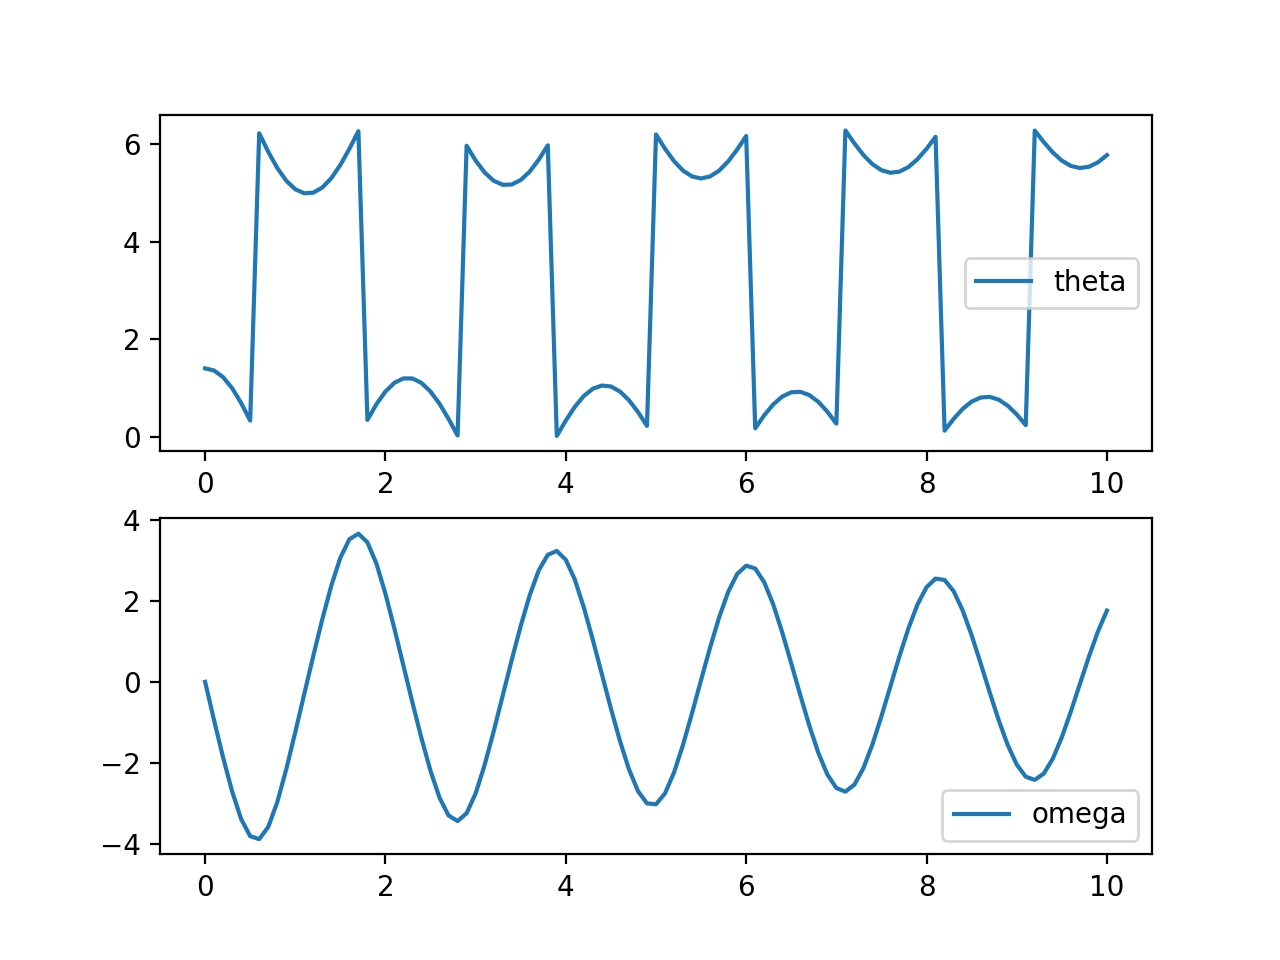

<IPython.core.display.Javascript object>


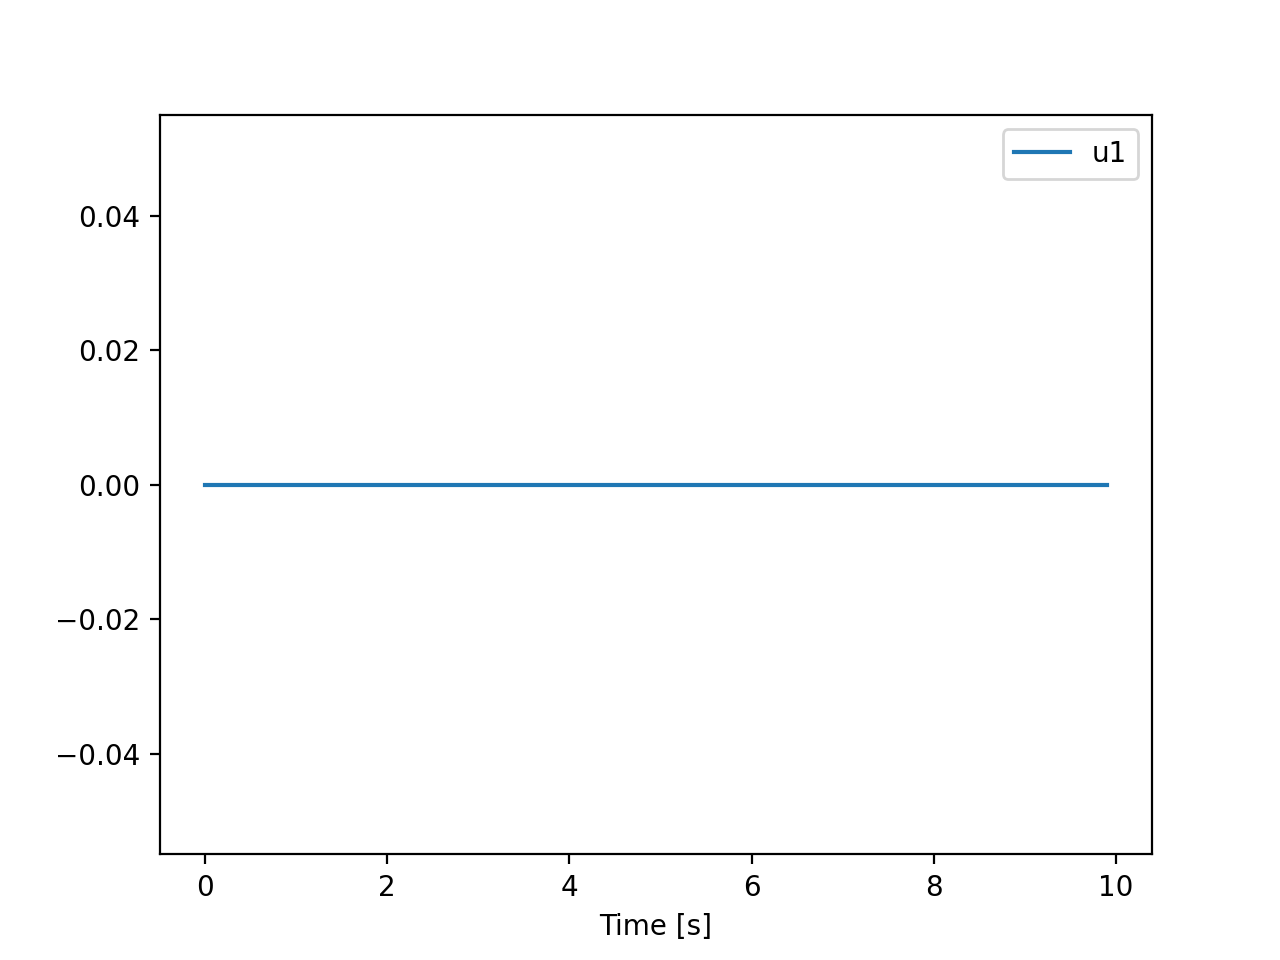

Text(0.5, 0, 'Time [s]')

In [5]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

In [6]:
# now we can also create an animation
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAA2pltZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DqhliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCLH/2+kONwAT9lg/NYjL/FoB9aiK4jE+YrYPvM3VJY4vjNnyLGP2YlbJp/NpBJUrBdMYUhyrz7P
5apm+oGk4bUbHFR5FzyI9ajBPlsbHoOh7z8pK0EiqMUzXsdnSuPKpMBaFdvexFsZpfdheIkeR9nc
0ITyzYHeeS6JwPjmtV2sfNoqzekXITbJ4Zh1jvl9n08hwvr7UO02jXn0Owh50dZbkF56hR4wicCv
LRwpELwO8cN8X1MJqu0gEEsxhIs6TP3YdJ0Pua9JN2ZwU30ZwVPYH+AOycAUF/b9pFk95XFXRxCq
PJ0AVrNvSkCKxJc2DnGq23y1nGBZ127xxqpU/iZDJagFvguNC7oG/xZGBYBEohvF6/LewX2aA+aH
L9961Ual9aaqniJf99yYZLba5T918fBuhKRnQx2/OE2fXnTWFdX+hLf+A4thKU1YDHM2eQfJCDxY
2jTNsRL6SJEKdNCCLHbV/gU/IaS8u27PZv6JbgE1OQzWCRkv/DKEmi9PYyQr4mTRrF8QRZJKJMfu
HOb9LHOidxhkifkFnoDfF7Z6xn6mDvAAWWxNk6L5f272csTMwG23jMQSBn4LfY8Odlp752zksEjq
v/eTayfCnxcJNz18JDoilNL4rAFExxIvIXTZF7s5Baik5q/D+oax4Lx4vJABcB9JpQAAAwJYYKOV
NMrl6KL4CPFo+XNAOJFYk5sHzZRaw9tq65pGNPkyV48tmLE4MR/lYy1BluJ2nSlIFkKgzH5oQXZX
MTqb7pdBAMlFlP9AA2i74xZrzWA0Q4OFx4Bb1n/JvrZyxbFQnwWW/v8oPkxv2wXuScDxcgUbtwq5
qVH1xf4C+82wLdzNPCoPxP7VBPizkRCgEUI+s1TnIxkPhTM2T0n8ysjIZBi5xRXZVsNGqqGbKTz1
p8GsMLVOBN5wsZ58REFlh3kQCbgOf/LA+DFXUOi7qxaJ1b6g8iPLVPIPbgspo+vmnom2sZ7+ZCru
r6X3ow8bT6WM/Mgzein/6JydwqlEOPpQts4ZJw0Li4uuFRbFKM3cs6DmvEDljpcwCTJrpwl+3HxG
i21mXJ1MQMaXflhojcHoLZQNFsTQarP2zoSG7YVyg7gVWSy7W0XZ79CS/kGJnllsLJahewyTXr1u
SyJ4NrjcqX2nePKUO47JMJ0qd9BOBltxNd4ci6XsiuEou4/9xn8wirnq4eRw7eMIiOJsFA61HZoU
2utNCIkt8XdExP+Ottidds/Ut1Cnd3nbkl4Icq6XscAbvHoeJu8OYc3T6WJrbJcW8UIqY/4KiE33
XpOgrLsWmgTzbF3svKeqQOuz803WxWfM5/pZhq6Insc/s701sU17FxMQDre4yRpTQ4X4TF2Iwx/e
/D6mZojqG+zw4LquTp7F3Lcf2Ifw25c+TVS6+SUmb77/EP51NYV6IB3jiXjcQKDmmRL3enK/3MNR
/gKu0wmtVNEKaqD3+045sIkHaAspJ68ggN7OAJ7FFE2t0vLBz4s0E+pRk0UxCz5zGhx4FjSd1k8w
AJMh4hUph2gsHlgKC6Kd+yw2pptxzwNz+Krs+gtdUCT3BbbogH1NvkOCnuFrAp26F0tPAKhAg6JI
tGEs90KpcoWXUR3uM/2zp0NNUJc8/k3zsN5lQLBCLfmLCET7HEotiBBVhK3YSFT8tXIC30pXOzLw
QKWcFxH36yZBR/rYPKXKESRLP9YOO6HXGnEzXEIFXywPSU8MAXWup6VkOGMZaei/EblIYY+cEg8N
446Roy7DM1hptoVHChTo4HsmRLBuV3p3SajZYG6LD/RY6rjwITQR+gZpG+ZnpVhC63IlScvd2ynN
rfIbWqcttFqDacGt2Azy1EY9XUms3WRkPA95mNz8/4r7MaPz3wVbk3STSDP4dNWPTcUArSFUVd48
NpacZB1I229ju4qVotR5VEv/BytFD40PVT0MZ0W3v+xaO7RLL/Ik4dRiPAZztuR9tgL27xhmYZrh
c2U/7rLtHQ4i8ENlr3XOE5oWZNmdr2Okv87Pf/SwWmLWPN1fHl+A5ayFaZ+nRAf0Wyvfzn1MOi24
h/TWEo7usR81c+Xr+OGoSiXmuDnEYPlvMw95yPoahhXx9+yqaXvK7E1hfibW4JYTbtyKBkrmrJ32
6Sc1vc8MMrIYVRidW9pv3661DT5IxZrE13eeDHN9HgU1PD1uvdV3W3N4O7otNhoRpPdhSMdLVJn+
mKaCgRDTMAKOJinGRzSMgp61lh1Ge5rK2mQhUnuwcoYEND1O4rjAajHfPYLWekumO2rAS+Smijd1
+I1fO2XfAd5tmP5BWGP/ybN1IB+L6U2K4Ylan4dHOfmffdEo2M2g0iDi13tR4B5SRD/xmYuhRlDS
3gGCx2iU3Iei8JP0YAllON6tu+A7zqszF4Eako5HfRQf0587kJDjhdhfPQU36zXJ38jLbL83/jEr
LYsarQ1hUS67tZYM6PW3mDHvtS8EuIezwxMQTWE7cW1dT+6+o5Mdk3Wzus9YdU0VUEhjjcPVo+k/
MuejlKRQT2gMU6Ds7QuhhFkTy9P6Ya2AuBhdgNAQH+A1wNA12nRNcHCD8IOcsM+Uup6Nzlb9PFu8
3n7027xkuLY8OeYAWnI0XbaEHVVEo/gqFdRM/jZHHddvC7Ktlw17sXZ3oL5NzfGvhfXyldI88R52
/cjj3LcDOJiGQeMSaYBNXh/EucW21O0c6v3028IrAOoUFTAQ/nx0YjNG/T3ORYv1PXnUedPQbt/7
LuvD0f2Xs6+yYTVAdt/omzkNeUDF5SZWLXjCOtaDx3Z5mYFEy4HPsU8avLAX5VeWPJBLOng3glbW
PtaEE9zzqFZD0JuKSkA38

We also need to discretize the state space, we discretize $\theta \in [0, 2\pi]$ in 50 states and $\dot{\theta} \in [-6, 6]$ is 50 states. For example:

In [7]:
# we don't want 2pi to be in the set because it's the same as 0
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

# now given an arbitrary continuous state theta
theta_arbitrary = 0.6234
omega_arbitrary = 1.234

# we can find the index of the closest element in the set of discretized states
index_in_discretized_theta = np.argmin(np.abs(discretized_theta - theta_arbitrary))
index_in_discretized_omega = np.argmin(np.abs(discretized_omega - omega_arbitrary))

# and find the closed discretized state
closest_theta_state = discretized_theta[index_in_discretized_theta]
closest_omega_state = discretized_omega[index_in_discretized_omega]

print(f'the discretized theta closest to {theta_arbitrary} is {closest_theta_state} with index {index_in_discretized_theta}')
print(f'the discretized omega closest to {omega_arbitrary} is {closest_omega_state} with index {index_in_discretized_omega}')

the discretized theta closest to 0.6234 is 0.6283185307179586 with index 5
the discretized omega closest to 1.234 is 1.3469387755102042 with index 30


<IPython.core.display.Javascript object>


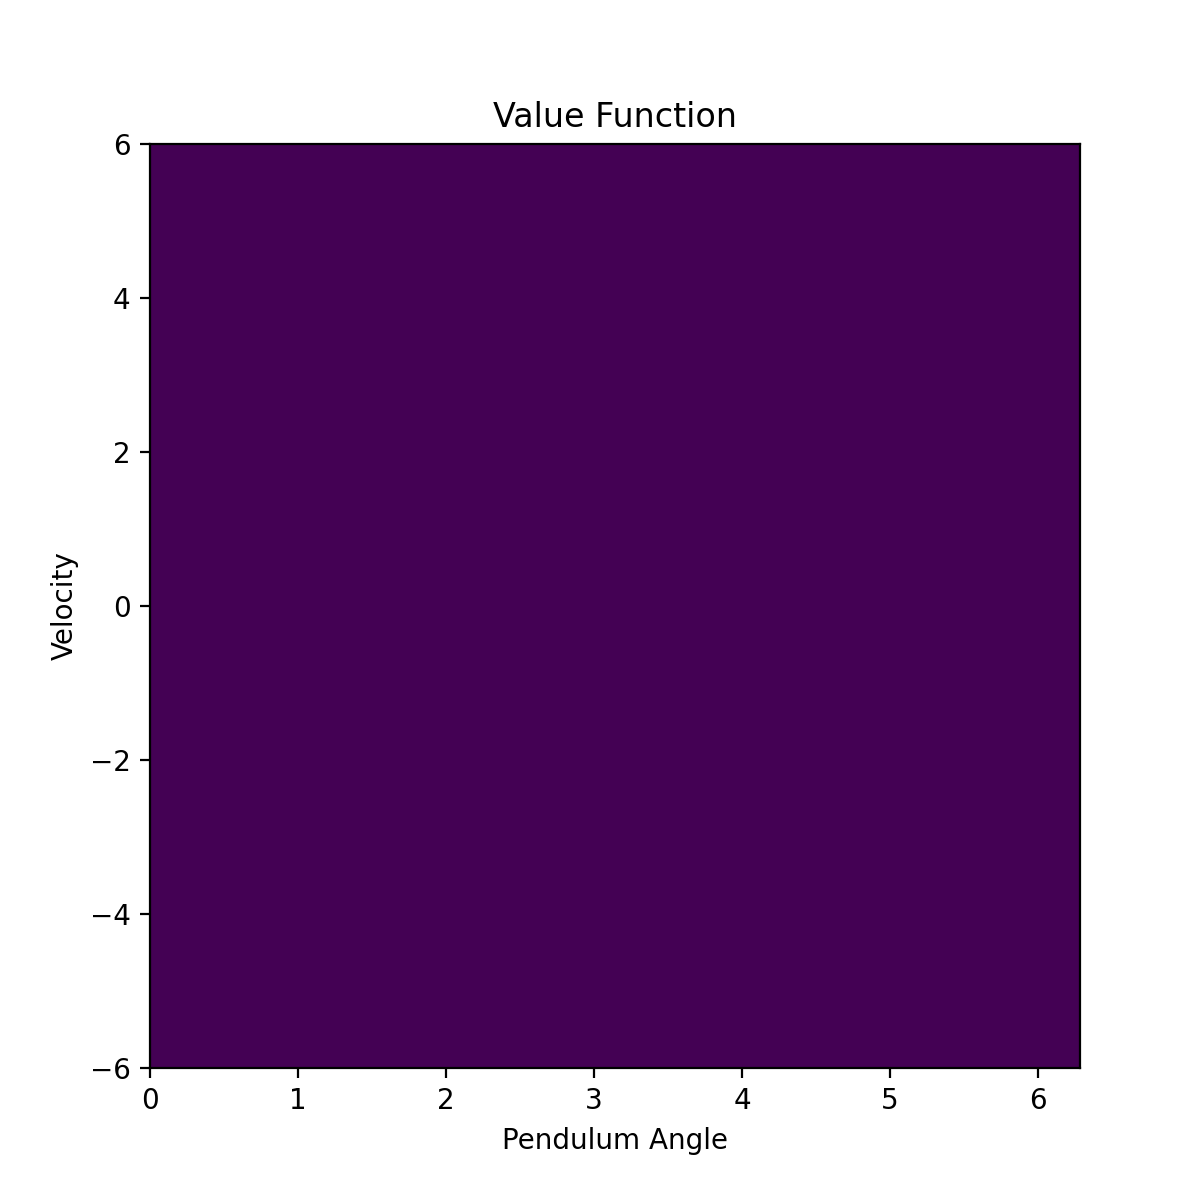

<IPython.core.display.Javascript object>


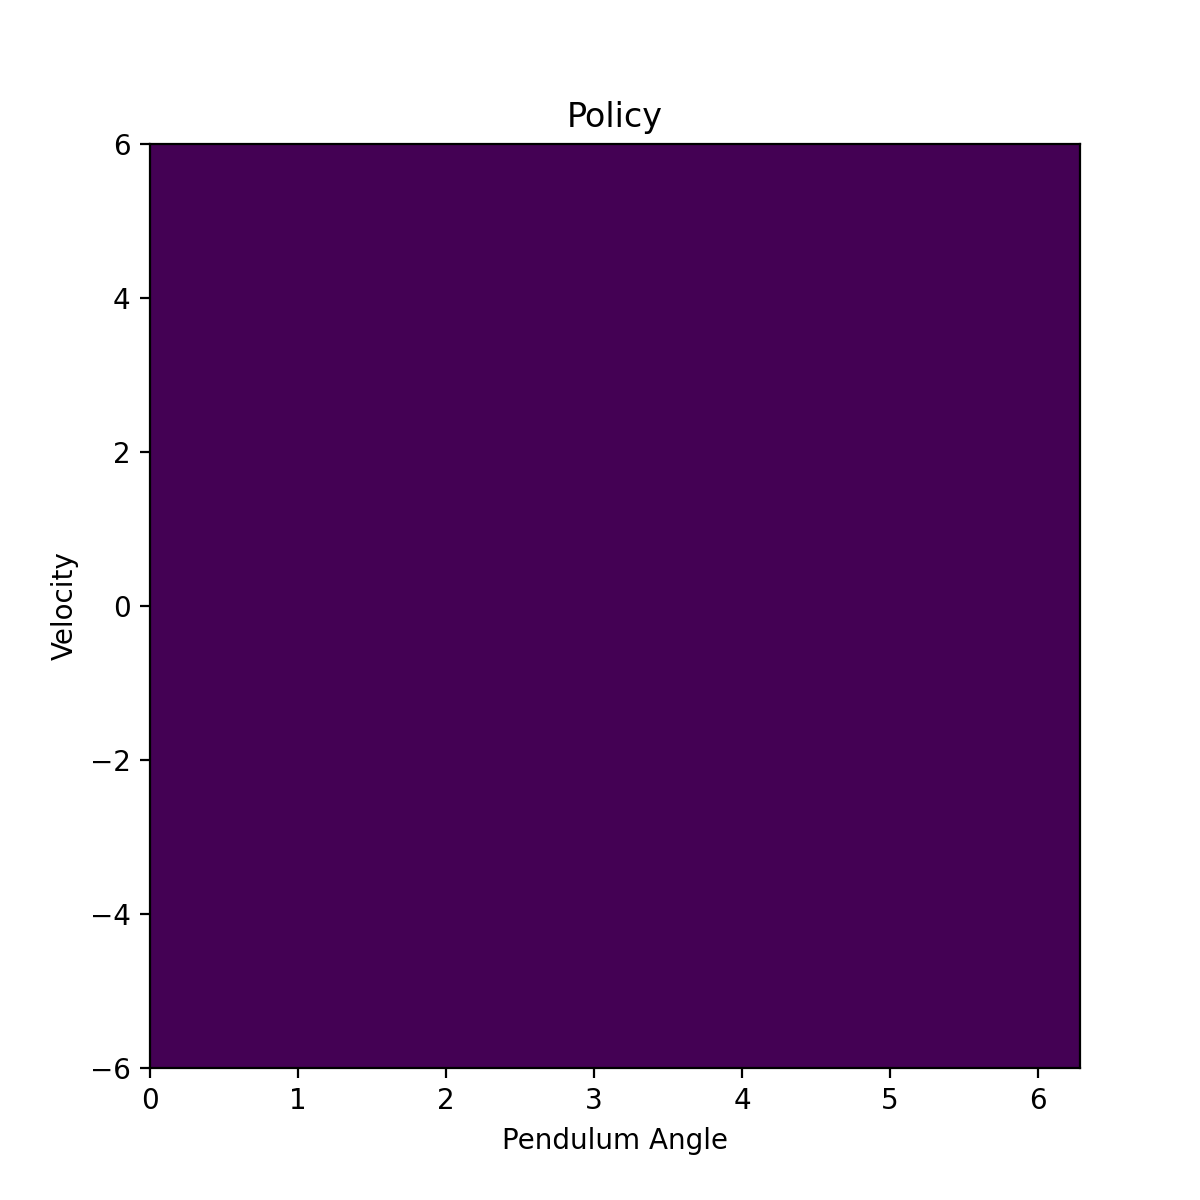

Text(0.5, 1.0, 'Policy')

In [8]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])

# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')